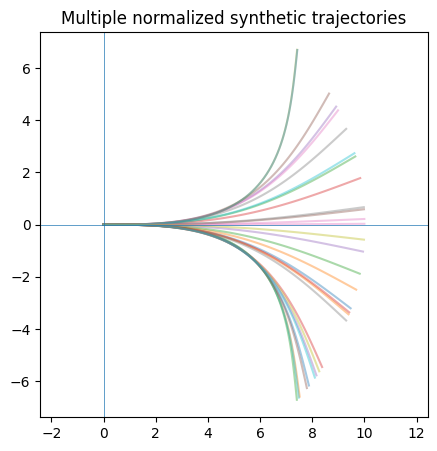

In [5]:
plt.figure(figsize=(5, 5))

for _ in range(30):
    # Randomize curvature slightly
    t = np.linspace(0, 1, 60)
    curvature = np.random.uniform(-3, 3)
    
    x = t * 10
    y = curvature * np.sin(t * np.pi)
    
    heading = np.arctan2(y[1] - y[0], x[1] - x[0])
    
    x_rec, y_rec = recenter_trajectory(x, y)
    x_rot, y_rot = rotate_trajectory(x_rec, y_rec, heading)
    
    plt.plot(x_rot, y_rot, alpha=0.4)

plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.axis("equal")
plt.title("Multiple normalized synthetic trajectories")
plt.show()


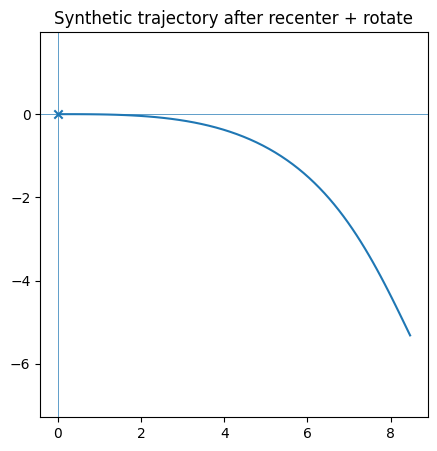

In [4]:
# Synthetic example: a gentle left-turn-like curve
t = np.linspace(0, 1, 60)
x = t * 10
y = 2 * np.sin(t * np.pi)

# Estimate initial heading from the first step
heading = np.arctan2(y[1] - y[0], x[1] - x[0])

# Normalize
x_rec, y_rec = recenter_trajectory(x, y)
x_rot, y_rot = rotate_trajectory(x_rec, y_rec, heading)

# Plot
plt.figure(figsize=(5, 5))
plt.plot(x_rot, y_rot)
plt.scatter([0], [0], marker="x")  # start point
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.axis("equal")
plt.title("Synthetic trajectory after recenter + rotate")
plt.show() 


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def recenter_trajectory(x, y):
    """Shift trajectory so it starts at (0, 0)."""
    x0, y0 = x[0], y[0]
    return x - x0, y - y0

def rotate_trajectory(x, y, heading):
    """
    Rotate trajectory so initial heading aligns with +x axis.
    heading in radians.
    """
    R = np.array([
        [np.cos(-heading), -np.sin(-heading)],
        [np.sin(-heading),  np.cos(-heading)]
    ])
    xy = np.vstack([x, y])
    x_rot, y_rot = R @ xy
    return x_rot, y_rot




  